In [1]:
import pandas as pd
import seaborn as sns

In [2]:
!ls data

"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [3]:
data = pd.concat(pd.read_excel('data/3.План БС в штуках(строка=штука)_2021.xlsx', sheet_name=None), ignore_index=True)

In [4]:
data.drop(['№ Площадки', 'Регион', 'Диапазон', 'Площадка', 'Год \nплана'], axis=1, inplace=True)

In [5]:
data.rename(columns={"Дата ТЭ \n(ЧЧ.ММ.ГГ)": "date"}, inplace=True)

In [6]:
data.isna().sum()

Тип БС    0
date      0
exМР      0
dtype: int64

In [7]:
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month
data['day'] = pd.DatetimeIndex(data['date']).day

data.drop('date', axis=1, inplace=True)

In [8]:
data_grouped = data.groupby(['year', 'month', 'exМР']).count()

<AxesSubplot: xlabel='month', ylabel='Count'>

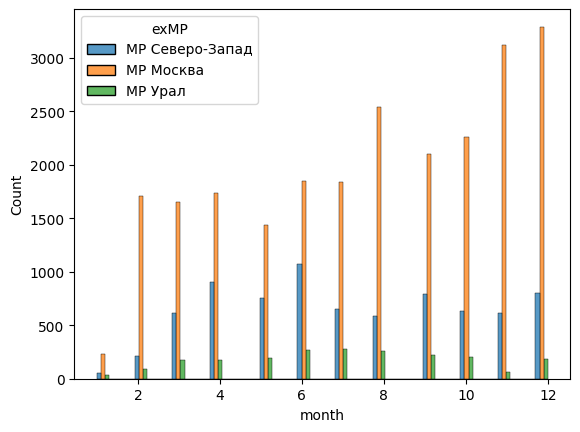

In [9]:
sns.histplot(data, x='month', hue='exМР', multiple='dodge')

In [10]:
data_grouped

Тип БС   day
year month exМР                         
2021 1     МР Москва           227   227
           МР Северо-Запад      54    54
           МР Урал              33    33
     2     МР Москва          1709  1709
           МР Северо-Запад     217   217
           МР Урал              87    87
     3     МР Москва          1657  1657
           МР Северо-Запад     618   618
           МР Урал             172   172
     4     МР Москва          1739  1739
           МР Северо-Запад     909   909
           МР Урал             174   174
     5     МР Москва          1435  1435
           МР Северо-Запад     753   753
           МР Урал             197   197
     6     МР Москва          1849  1849
           МР Северо-Запад    1073  1073
           МР Урал             271   271
     7     МР Москва          1841  1841
           МР Северо-Запад     652   652
           МР Урал             278   278
     8     МР Москва          2540  2540
           МР Северо-Запад     582   582
           МР Урал             263   263
     9     МР Москва          2101  2101
           МР Северо-Запад     793   793
           МР Урал             222   222
     10    МР Москва          2257  2257
           МР Северо-Запад     629   629
           МР Урал             206   206
     11    МР Москва          3120  3120
           МР Северо-Запад     614   614
           МР Урал              59    59
     12    МР Москва          3292  3292
           МР Северо-Запад     802   802
           МР Урал             186   186

In [11]:
data.to_csv('plan_bs.csv', index=False)